<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Task_Fruits_360_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve

In [2]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-07-30 05:58:00--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-30 05:58:00 (69.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

#upload data USING KAGGLE API

In [4]:
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 99% 1.27G/1.28G [00:19<00:00, 120MB/s] 
100% 1.28G/1.28G [00:19<00:00, 70.1MB/s]


#unzip_data

In [5]:
unzip_data('/content/fruits.zip')

#train_test_split

In [112]:
train_dir = '/content/fruits-360-original-size/fruits-360-original-size/Training'
test_dir = '/content/fruits-360-original-size/fruits-360-original-size/Test'
valid_dir = '/content/fruits-360-original-size/fruits-360-original-size/Validation'

In [87]:
walk_through_dir(train_dir)

There are 24 directories and 0 images in '/content/fruits-360-original-size/fruits-360-original-size/Training'.
There are 0 directories and 318 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/apple_crimson_snow_1'.
There are 0 directories and 319 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/apple_rotten_1'.
There are 0 directories and 160 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/zucchini_1'.
There are 0 directories and 96 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/cabbage_white_1'.
There are 0 directories and 300 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/apple_red_delicios_1'.
There are 0 directories and 308 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1'.
There are 0 directories and 160 images in '/content/fruits-360-original-size/fruits-360-original-size/Training/z

In [88]:
walk_through_dir(test_dir)

There are 24 directories and 0 images in '/content/fruits-360-original-size/fruits-360-original-size/Test'.
There are 0 directories and 159 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1'.
There are 0 directories and 159 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/apple_rotten_1'.
There are 0 directories and 80 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/zucchini_1'.
There are 0 directories and 47 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/cabbage_white_1'.
There are 0 directories and 150 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/apple_red_delicios_1'.
There are 0 directories and 154 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/apple_golden_1'.
There are 0 directories and 80 images in '/content/fruits-360-original-size/fruits-360-original-size/Test/zucchini_dark_1'.
There are 0 direc

In [89]:
walk_through_dir(valid_dir)

There are 24 directories and 0 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation'.
There are 0 directories and 159 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1'.
There are 0 directories and 160 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_rotten_1'.
There are 0 directories and 80 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation/zucchini_1'.
There are 0 directories and 48 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation/cabbage_white_1'.
There are 0 directories and 150 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_red_delicios_1'.
There are 0 directories and 154 images in '/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_1'.
There are 0 directories and 80 images in '/content/fruits-360-original-size/fruits-360-original-siz

In [92]:
import os
def count_files_in_subdirs(directory, set_name):
    counts = {}
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            counts[item] = len(os.listdir(item_path))
    df = pd.DataFrame(counts, index=[set_name])
    return df

train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)

valid_count = count_files_in_subdirs(valid_dir, 'valid')
print(test_count)

       apple_crimson_snow_1  apple_rotten_1  zucchini_1  cabbage_white_1  \
train                   318             319         160               96   

       apple_red_delicios_1  apple_golden_1  zucchini_dark_1  pear_1  \
train                   300             308              160     326   

       apple_red_2  apple_pink_lady_1  ...  cucumber_1  cucumber_3  \
train          318                313  ...         100         163   

       apple_golden_2  apple_granny_smith_1  apple_golden_3  apple_red_1  \
train             308                   320             316          309   

       eggplant_violet_1  carrot_1  apple_6  apple_red_3  
train                160       101      315          281  

[1 rows x 24 columns]
      apple_crimson_snow_1  apple_rotten_1  zucchini_1  cabbage_white_1  \
test                   159             159          80               47   

      apple_red_delicios_1  apple_golden_1  zucchini_dark_1  pear_1  \
test                   150             154   

In [94]:
train_df = train_count.transpose()
print(train_df)
print("\n")
print("\n")
test_df = test_count.transpose()
print(test_df)
print("\n")
print("\n")
valid_df = valid_count.transpose()
print(valid_df)

                      train
apple_crimson_snow_1    318
apple_rotten_1          319
zucchini_1              160
cabbage_white_1          96
apple_red_delicios_1    300
apple_golden_1          308
zucchini_dark_1         160
pear_1                  326
apple_red_2             318
apple_pink_lady_1       313
apple_red_yellow_1      308
apple_hit_1             468
apple_braeburn_1        320
pear_3                  144
cucumber_1              100
cucumber_3              163
apple_golden_2          308
apple_granny_smith_1    320
apple_golden_3          316
apple_red_1             309
eggplant_violet_1       160
carrot_1                101
apple_6                 315
apple_red_3             281




                      test
apple_crimson_snow_1   159
apple_rotten_1         159
zucchini_1              80
cabbage_white_1         47
apple_red_delicios_1   150
apple_golden_1         154
zucchini_dark_1         80
pear_1                 162
apple_red_2            159
apple_pink_lady_1      156

<Axes: >

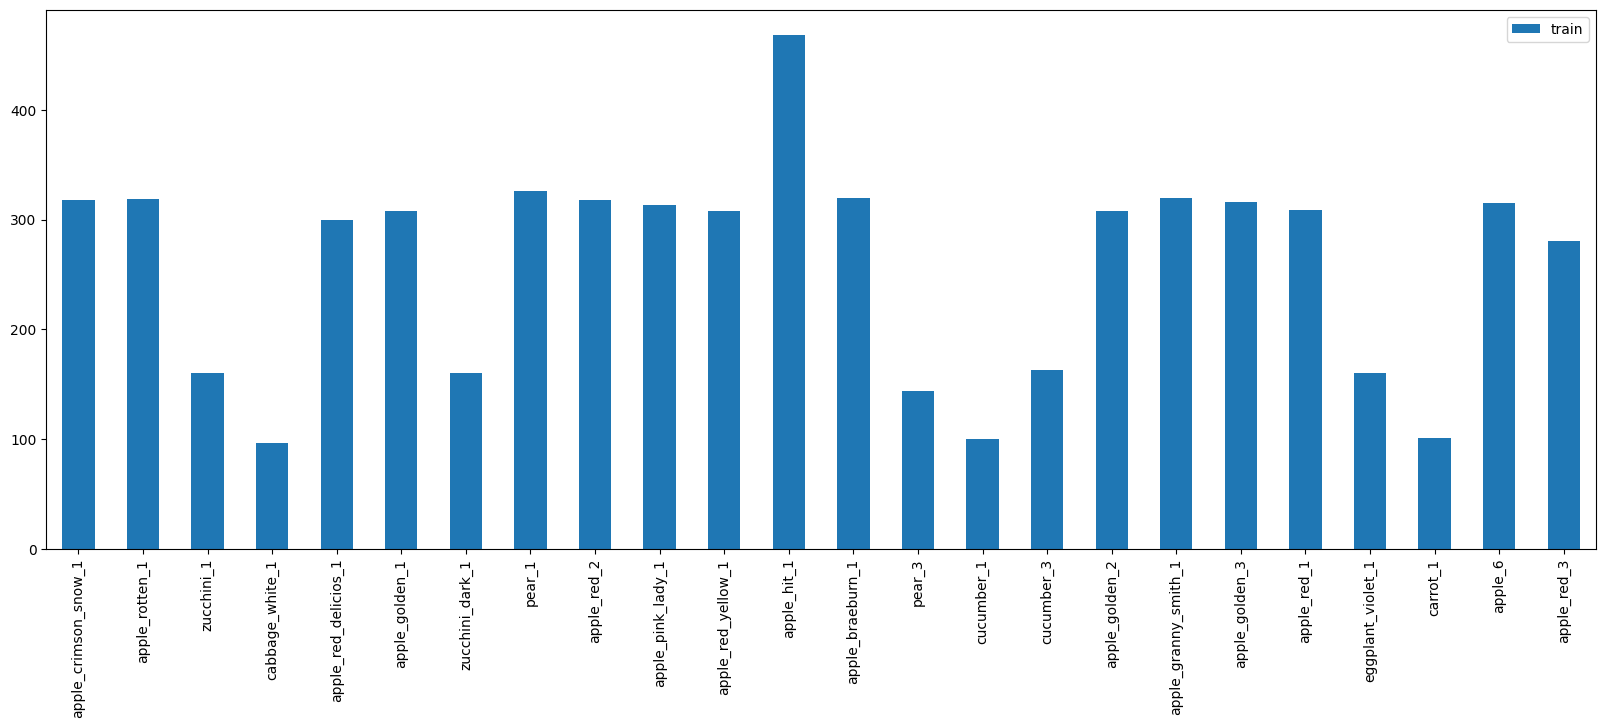

In [96]:
train_df.plot(kind='bar', figsize=(20, 7))

<Axes: >

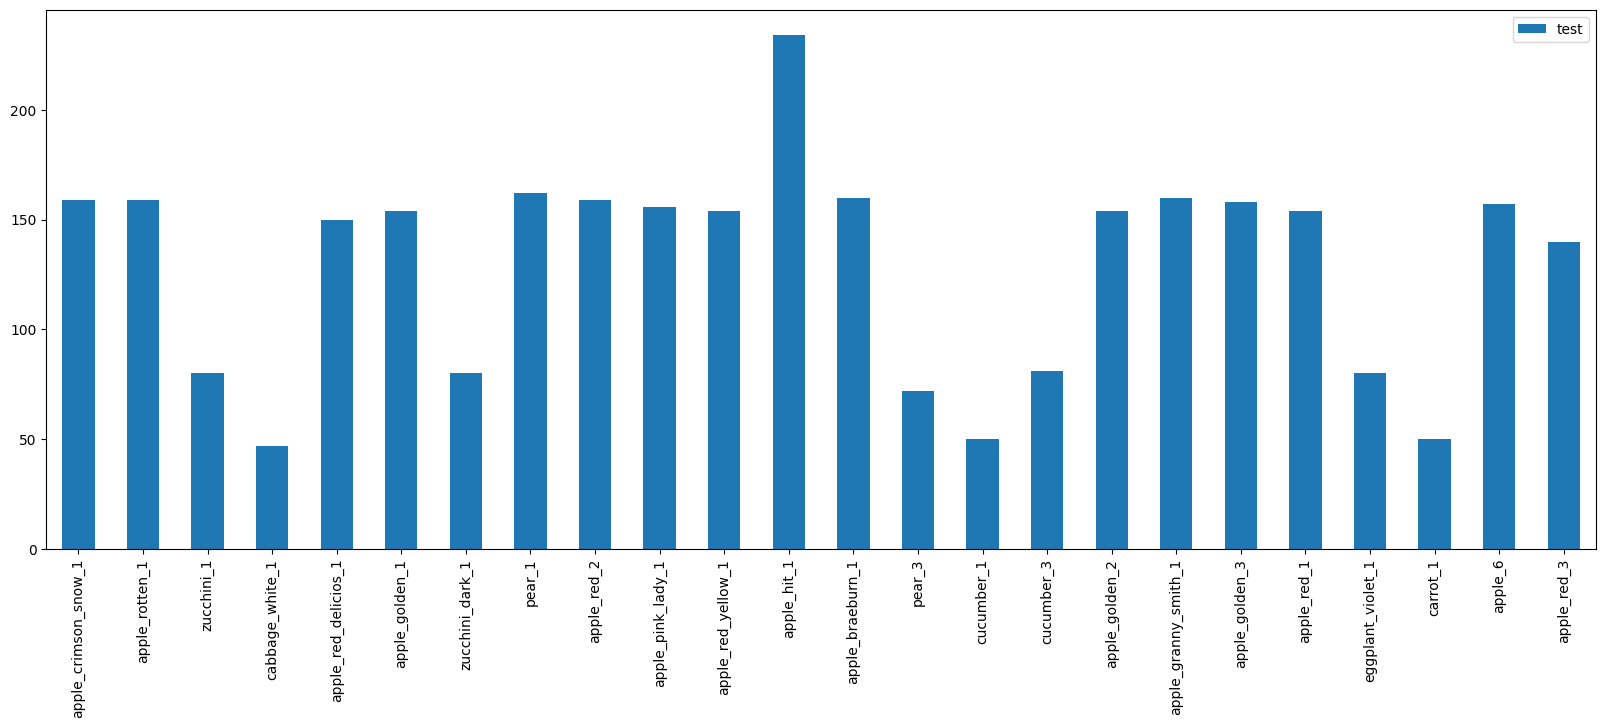

In [98]:
test_df.plot(kind='bar', figsize=(20, 7))

<Axes: >

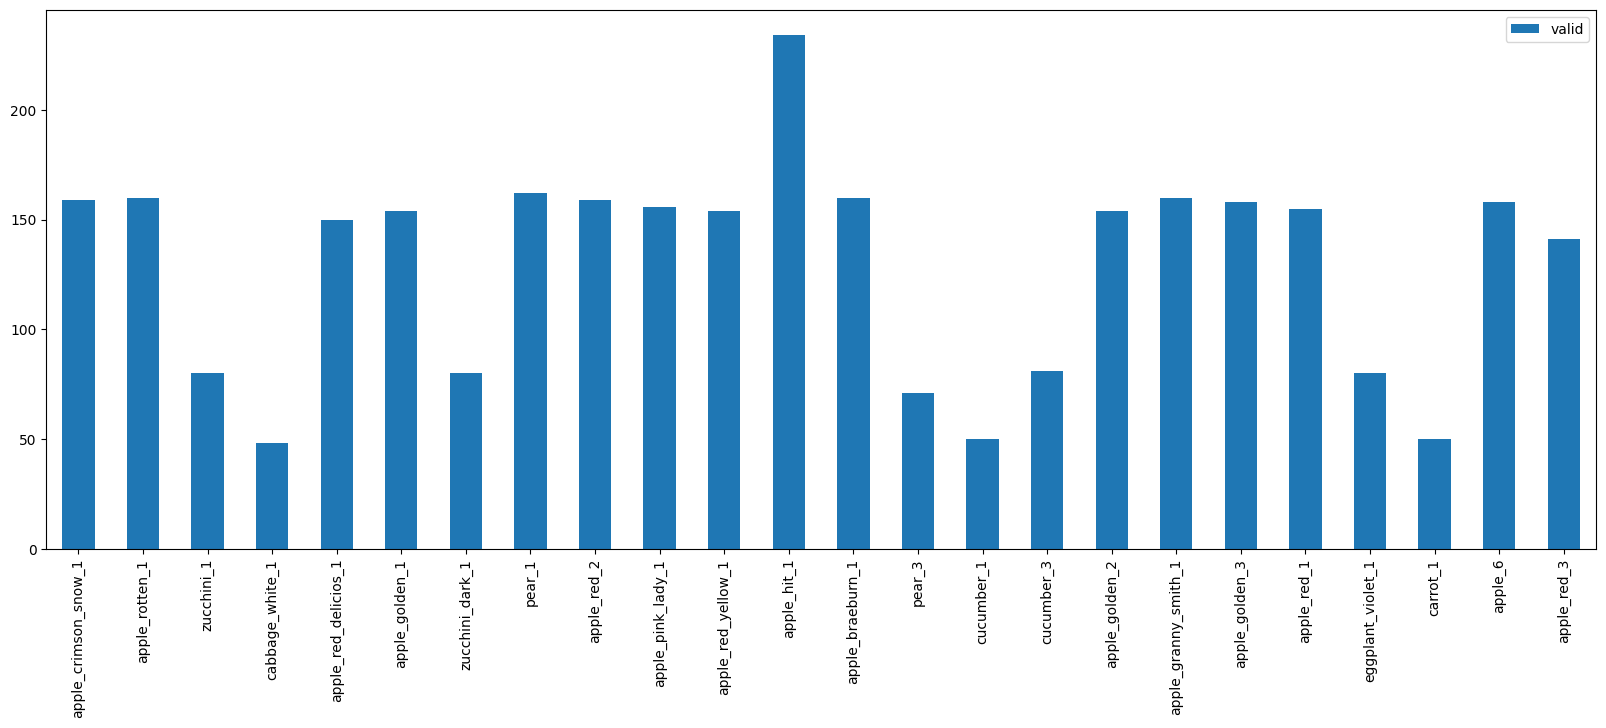

In [99]:
valid_df.plot(kind='bar', figsize=(20, 7))

In [100]:
from PIL import Image
def view_image_shapes_pillow(directory):
    image_shapes = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    shape = img.size + (len(img.getbands()),)
                    image_shapes.append((image_path, shape))
                    print(f"{image_path}: {shape}")

    return image_shapes


image_shapes = view_image_shapes_pillow(train_dir)

Streaming output truncated to the last 5000 lines.
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r1_278.jpg: (359, 367, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r1_200.jpg: (357, 371, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r1_256.jpg: (346, 367, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r0_52.jpg: (358, 322, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r1_60.jpg: (341, 369, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r0_210.jpg: (372, 323, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r1_72.jpg: (333, 370, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1/r0_32.jpg: (367, 321, 3)
/content/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_

In [101]:
def view_image_shapes_pillow(directory):
    image_shapes = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    shape = img.size + (len(img.getbands()),)
                    image_shapes.append((image_path, shape))
                    print(f"{image_path}: {shape}")

    return image_shapes


image_shapes = view_image_shapes_pillow(test_dir)

/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_19.jpg: (567, 567, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_107.jpg: (629, 590, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_255.jpg: (653, 580, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r0_243.jpg: (646, 557, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_203.jpg: (634, 596, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_99.jpg: (636, 587, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_187.jpg: (637, 600, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r1_159.jpg: (569, 600, 3)
/content/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r0_187.jpg: (604, 550, 3)
/co

In [102]:
from PIL import Image
def view_image_shapes_pillow(directory):
    image_shapes = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    shape = img.size + (len(img.getbands()),)
                    image_shapes.append((image_path, shape))
                    print(f"{image_path}: {shape}")

    return image_shapes


image_shapes = view_image_shapes_pillow(valid_dir)

/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r1_281.jpg: (606, 572, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_5.jpg: (582, 577, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r1_189.jpg: (637, 599, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_273.jpg: (621, 568, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r1_81.jpg: (637, 582, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_41.jpg: (613, 561, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r1_37.jpg: (584, 571, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/apple_crimson_snow_1/r0_9.jpg: (582, 576, 3)
/content/fruits-360-original-size/fruits-360-original-size/Validation/a

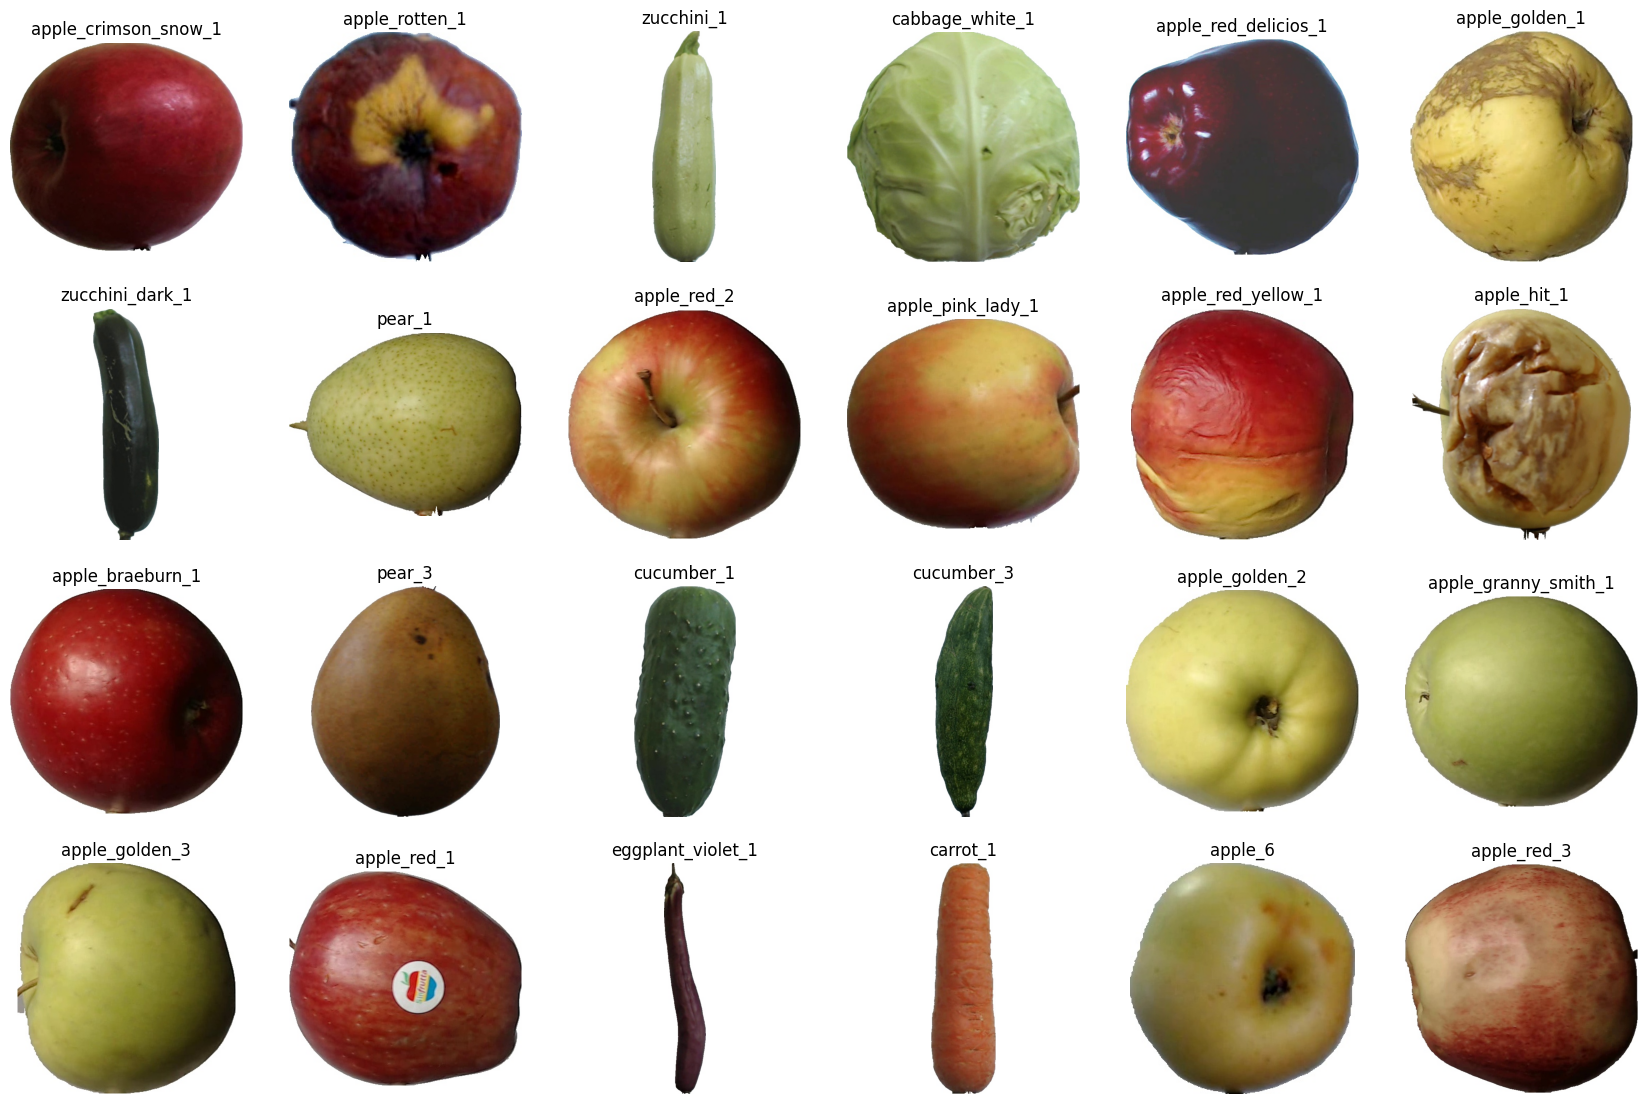

In [104]:
fruits = os.listdir(train_dir)
plt.figure(figsize=(21,21))

for i, fruit in enumerate(fruits, 1):
    folder = os.path.join(train_dir, fruit)
    img_path = os.path.join(folder, os.listdir(folder)[12])
    img = plt.imread(img_path)
    plt.subplot(6, 6, i)
    plt.imshow(img, cmap='gray')
    plt.title(fruit)
    plt.axis('off')

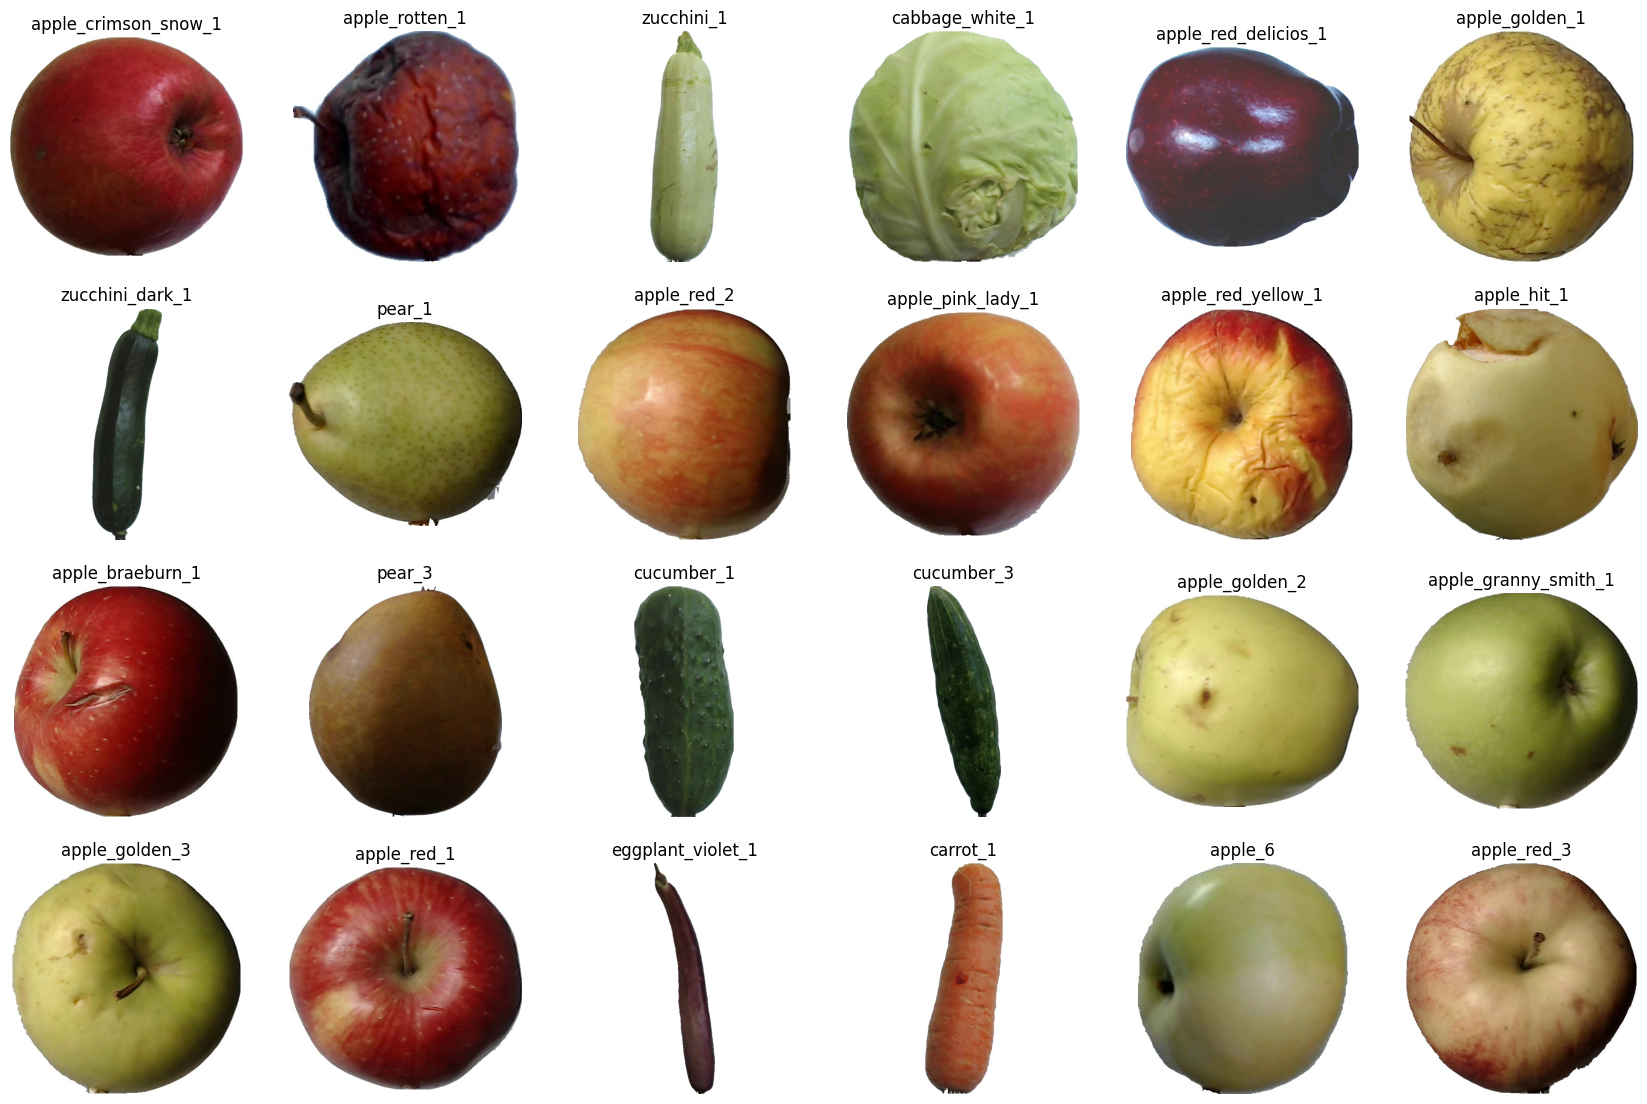

In [105]:
fruits = os.listdir(test_dir)
plt.figure(figsize=(21,21))

for i, fruit in enumerate(fruits, 1):
    folder = os.path.join(test_dir, fruit)
    img_path = os.path.join(folder, os.listdir(folder)[6])
    img = plt.imread(img_path)
    plt.subplot(6, 6, i)
    plt.imshow(img, cmap='gray')
    plt.title(fruit)
    plt.axis('off')

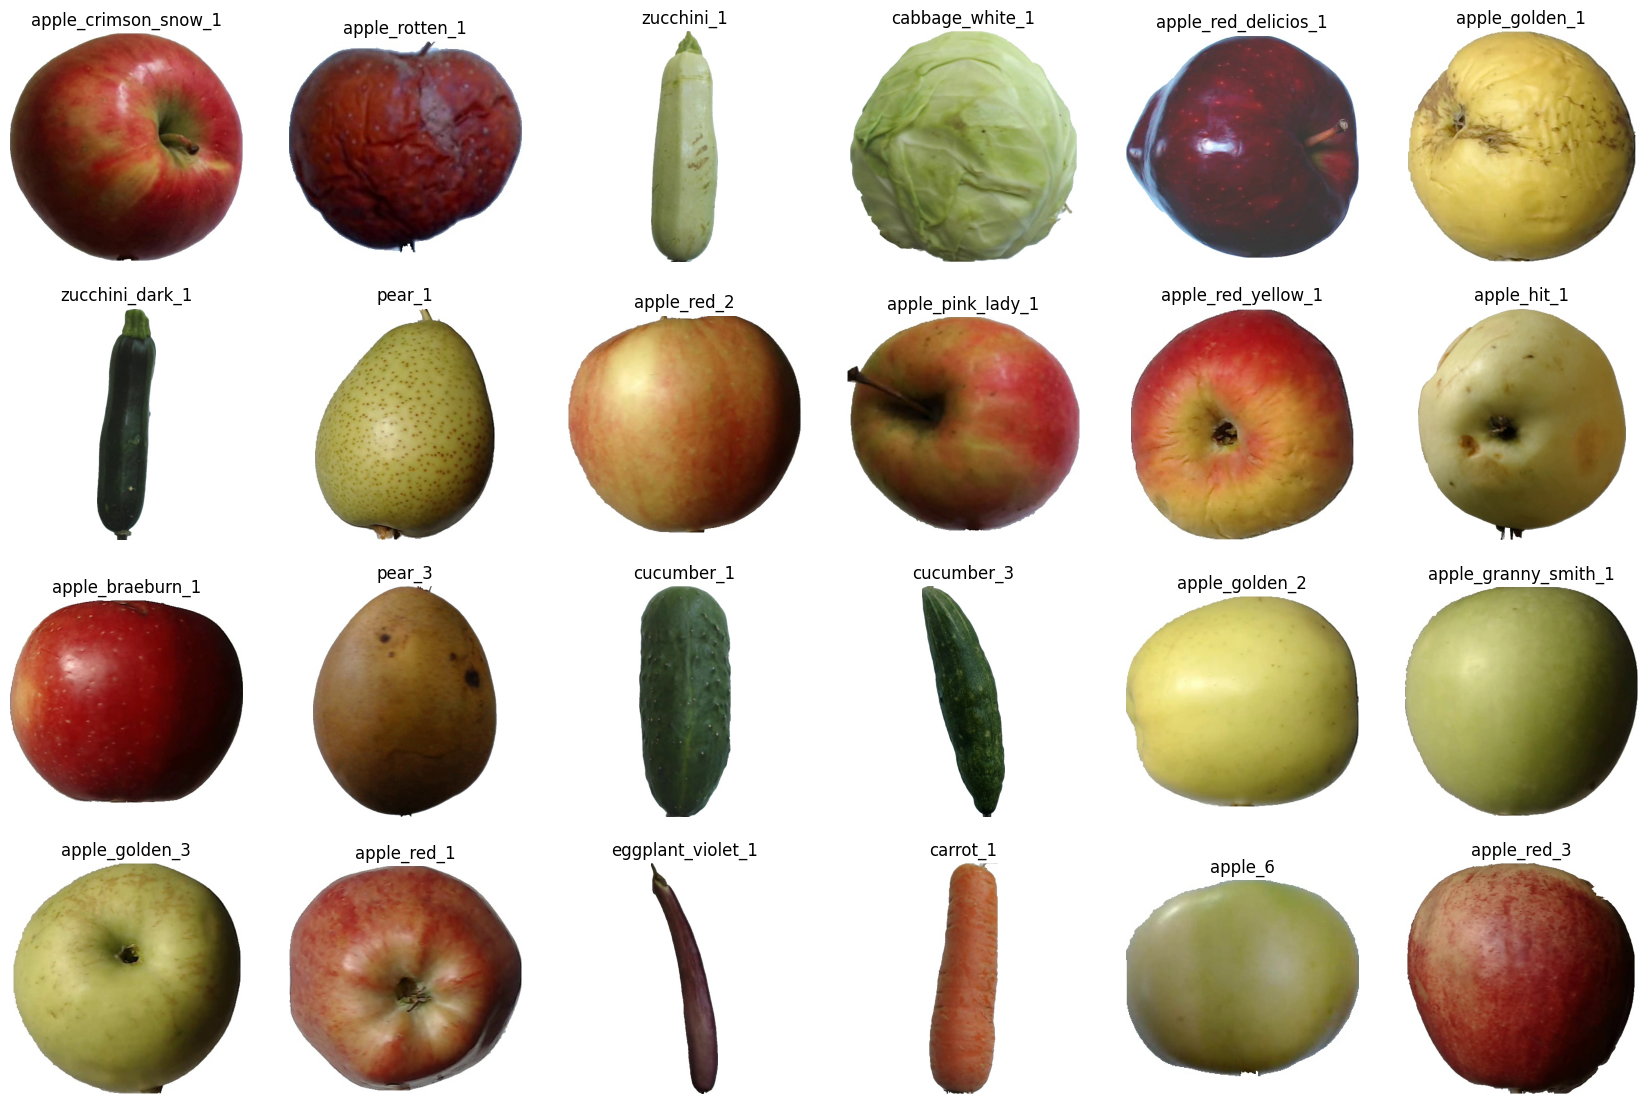

In [107]:
fruits = os.listdir(valid_dir)
plt.figure(figsize=(21,21))

for i, fruit in enumerate(fruits, 1):
    folder = os.path.join(valid_dir, fruit)
    img_path = os.path.join(folder, os.listdir(folder)[6])
    img = plt.imread(img_path)
    plt.subplot(6, 6, i)
    plt.imshow(img, cmap='gray')
    plt.title(fruit)
    plt.axis('off')

#DATA Augmentation

In [187]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_aug = ImageDataGenerator(rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True)


valid_data_aug = ImageDataGenerator(validation_split=0.2)


test_data_aug = ImageDataGenerator()

#train test and valid split

In [188]:
train_data = train_data_aug.flow_from_directory(directory=train_dir,
                                                target_size=(224,224),
                                                batch_size=16,
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                subset='training')


valid_data = valid_data_aug.flow_from_directory(directory=train_dir,
                                                target_size=(224,224),
                                                batch_size=16,
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                subset='validation',
                                                shuffle=False)


test_data = test_data_aug.flow_from_directory(directory=test_dir,
                                                target_size=(224,224),
                                                batch_size=16,
                                                shuffle=False,
                                                color_mode='rgb',
                                                class_mode='categorical')


Found 6231 images belonging to 24 classes.
Found 1238 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


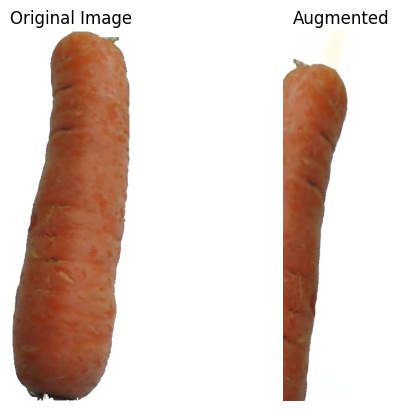

In [126]:
import random
import matplotlib.pyplot as plt
import os

# Choose a random image from the training directory
random_folder = random.choice(os.listdir(train_dir))
random_file = random.choice(os.listdir(os.path.join(train_dir, random_folder)))
random_image_path = os.path.join(train_dir, random_folder, random_file)

# Load the original image
img = plt.imread(random_image_path)

# Preprocess the image to match the ImageDataGenerator's input format
img_array = img.reshape((1,) + img.shape)  # Add batch and channel dimensions
img_array = img_array / 255.0  # Rescale pixel values

# Apply augmentations to the image using the ImageDataGenerator
augmented_images = train_data_aug.flow(img_array, batch_size=1)
augmented_img = next(augmented_images)[0]  # Get the first (and only) augmented image

# Display the original and augmented images
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis(False)

plt.subplot(1,2,2)
plt.imshow(augmented_img)
plt.title('Augmented')
plt.axis(False)
plt.show()

In [127]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

390
78
195


#Create Model

#I used the fruit_recognition_deep_learning.pdf paper to build this model

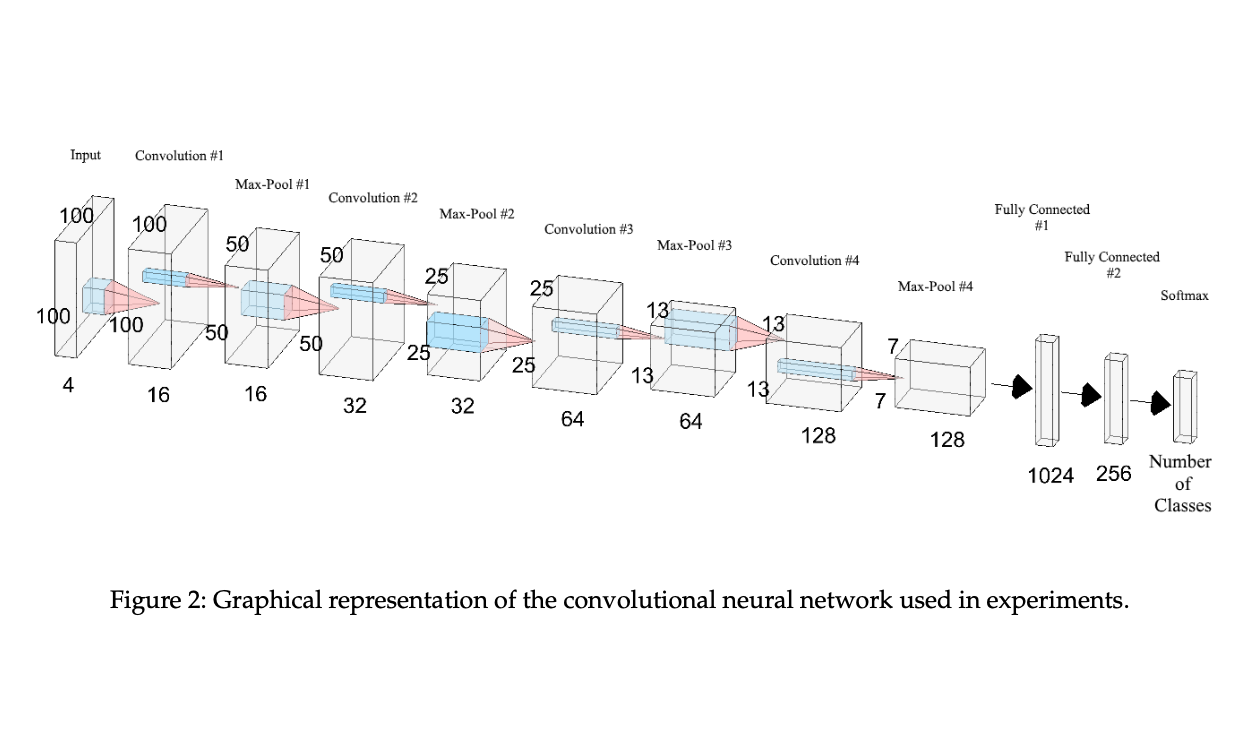

In [128]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [129]:
model_0.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 110, 110, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 49, 49, 64)        51264     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 24, 24, 64)       

In [130]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # gave 0.001 steps in the paper
                metrics=['accuracy'])

In [131]:
!pip install visualkeras
import visualkeras

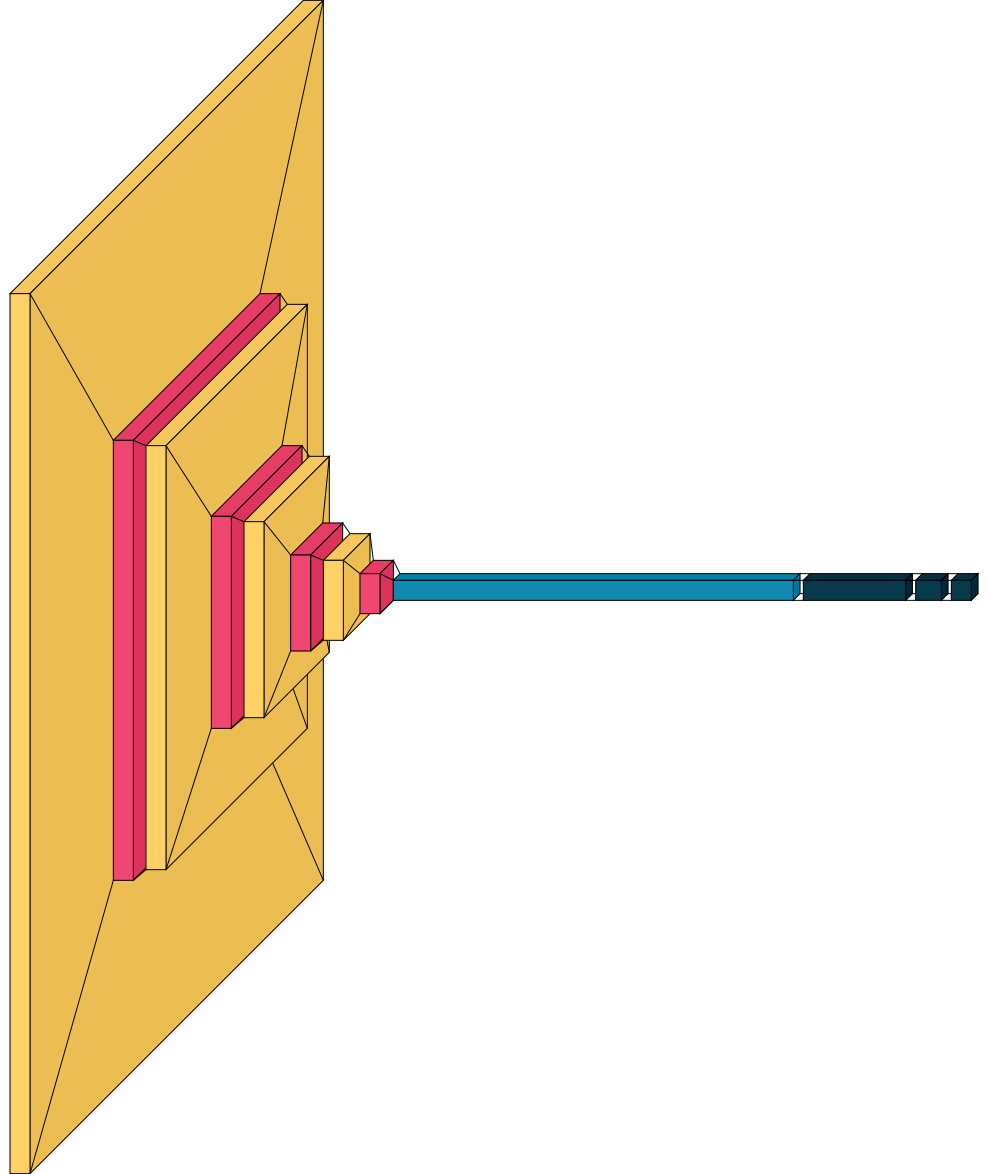

In [134]:
visualkeras.layered_view(model_0)

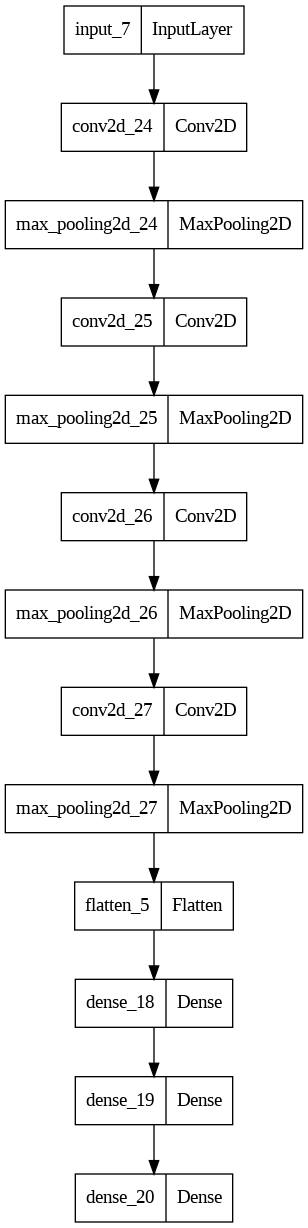

In [135]:
tf.keras.utils.plot_model(model_0)

#model_0 fit

In [136]:
history_0 = model_0.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
390/390 [==============================] - 98s 240ms/step - loss: 20.1444 - accuracy: 0.1526 - val_loss: 2.7176 - val_accuracy: 0.3174
Epoch 2/20
390/390 [==============================] - 85s 219ms/step - loss: 2.2940 - accuracy: 0.2756 - val_loss: 2.1873 - val_accuracy: 0.3489
Epoch 3/20
390/390 [==============================] - 87s 222ms/step - loss: 1.5996 - accuracy: 0.4346 - val_loss: 1.4124 - val_accuracy: 0.5428
Epoch 4/20
390/390 [==============================] - 85s 217ms/step - loss: 1.3857 - accuracy: 0.5004 - val_loss: 1.1604 - val_accuracy: 0.5614
Epoch 5/20
390/390 [==============================] - 85s 219ms/step - loss: 1.2341 - accuracy: 0.5599 - val_loss: 1.3076 - val_accuracy: 0.5533
Epoch 6/20
390/390 [==============================] - 84s 215ms/step - loss: 1.0988 - accuracy: 0.6025 - val_loss: 1.1261 - val_accuracy: 0.6397
Epoch 7/20
390/390 [==============================] - 85s 217ms/step - loss: 0.9326 - accuracy: 0.6647 - val_loss: 0.6228 - val_a

In [137]:
model_0.evaluate(valid_data)

78/78 [==============================] - 4s 51ms/step - loss: 0.3659 - accuracy: 0.8279


[0.36589592695236206, 0.8279483318328857]

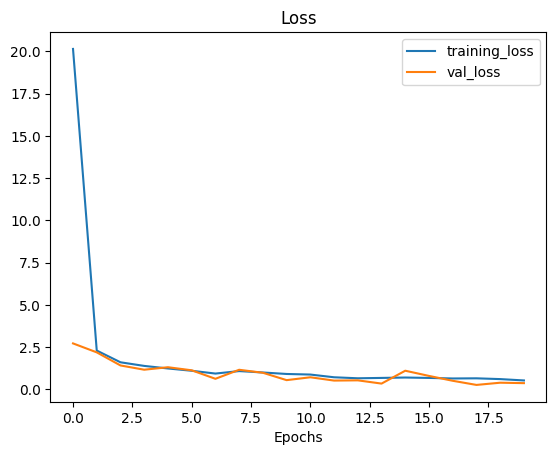

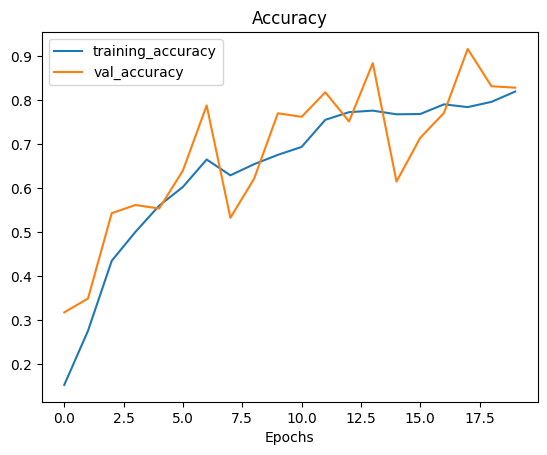

In [138]:
plot_loss_curves(history_0)

195/195 [==============================] - 8s 43ms/step


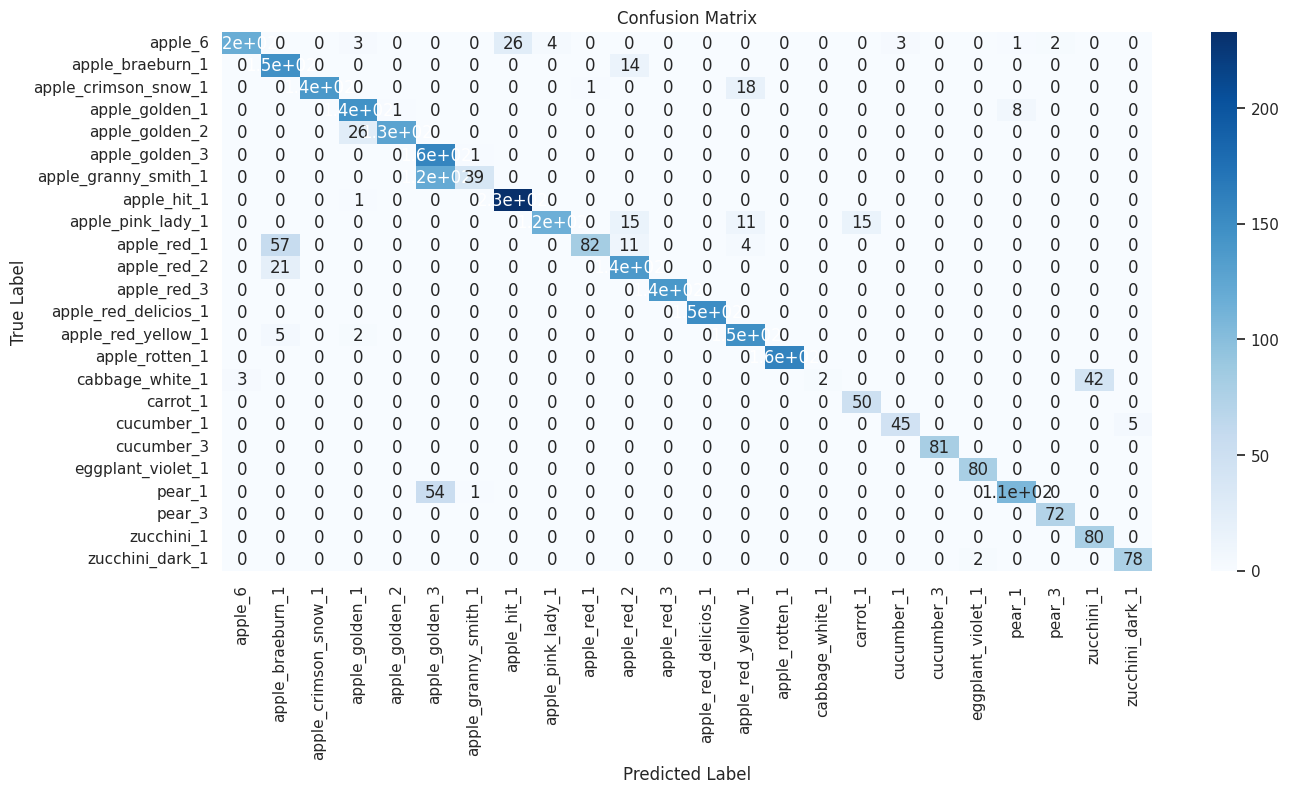

In [139]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

validation_labels = test_data.classes
validation_pred_probs = model_0.predict(test_data)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_data.class_indices.keys())
sns.set()
plt.figure(figsize=(15, 7))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [140]:
class_labels = list(test_data.class_indices.keys())
class_labels

['apple_6',
 'apple_braeburn_1',
 'apple_crimson_snow_1',
 'apple_golden_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_granny_smith_1',
 'apple_hit_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_2',
 'apple_red_3',
 'apple_red_delicios_1',
 'apple_red_yellow_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'cucumber_3',
 'eggplant_violet_1',
 'pear_1',
 'pear_3',
 'zucchini_1',
 'zucchini_dark_1']

In [141]:
true_classes = test_data.classes
true_classes

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int32)

In [143]:
batch_size = 16

predicted_classes = np.argmax(model_0.predict(test_data,
                                            steps=int(np.ceil(test_data.samples/test_data.batch_size))), axis=1)
predicted_classes

195/195 [==============================] - 8s 40ms/step


array([ 7,  7,  0, ..., 23, 23, 23])

In [144]:
cm = confusion_matrix(true_classes, predicted_classes)
cm

array([[118,   0,   0,   3,   0,   0,   0,  26,   4,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   0,   1,   2,   0,   0],
       [  0, 146,   0,   0,   0,   0,   0,   0,   0,   0,  14,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 140,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 145,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   8,   0,   0,   0],
       [  0,   0,   0,  26, 128,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 157,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 121,  39,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0

In [148]:
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
                       precision    recall  f1-score   support

             apple_6       0.98      0.75      0.85       157
    apple_braeburn_1       0.64      0.91      0.75       160
apple_crimson_snow_1       1.00      0.88      0.94       159
      apple_golden_1       0.82      0.94      0.88       154
      apple_golden_2       0.99      0.83      0.90       154
      apple_golden_3       0.47      0.99      0.64       158
apple_granny_smith_1       0.95      0.24      0.39       160
         apple_hit_1       0.90      1.00      0.95       234
   apple_pink_lady_1       0.97      0.74      0.84       156
         apple_red_1       0.99      0.53      0.69       154
         apple_red_2       0.78      0.87      0.82       159
         apple_red_3       1.00      1.00      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       0.82      0.95      0.88       154
      apple_rotten_1       1.00      1.00    

#Model_1 The architecture of GoogLeNet

this is googlenet architecture. I will try to fix the model by copying its design, I have used it in my projects. My github account is Elmir22 :)

#https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf

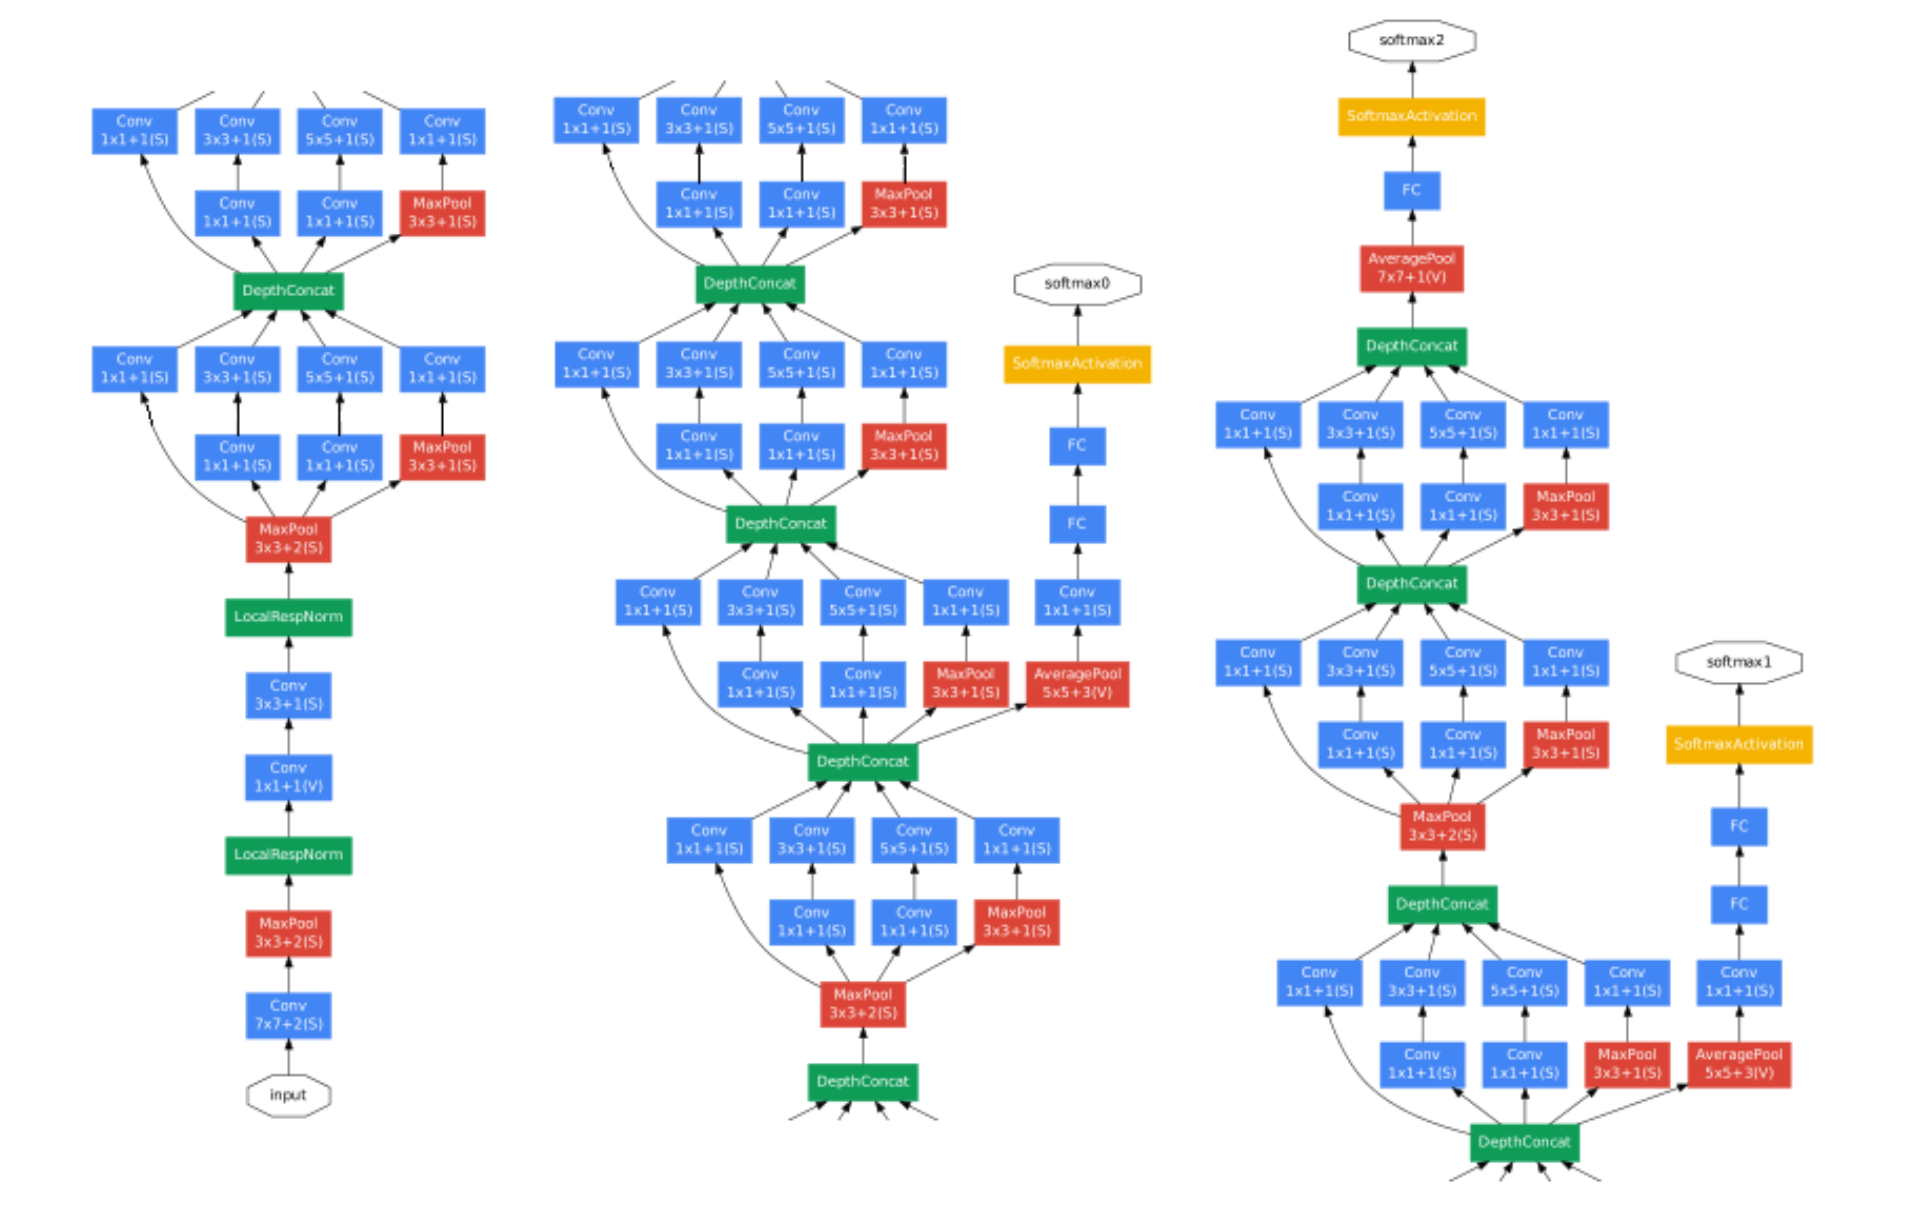

In [175]:
import tensorflow as tf

def inception_module(x, filters):
    # 1x1 convolution
    conv1x1 = tf.keras.layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)

    # 3x3 convolution
    conv3x3 = tf.keras.layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)
    conv3x3 = tf.keras.layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(conv3x3)

    # 5x5 convolution
    conv5x5 = tf.keras.layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)
    conv5x5 = tf.keras.layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu', kernel_initializer='he_normal')(conv5x5)

    # Max pooling
    maxpool = tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool = tf.keras.layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(maxpool)

    # Concatenate filters
    concat = tf.keras.layers.Concatenate(axis=-1)([conv1x1, conv3x3, conv5x5, maxpool])
    return concat

input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Initial layers
x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer='he_normal')(input_layer)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.Conv2D(192, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Inception modules
x = inception_module(x, [64, 96, 128, 16, 32, 32])
x = inception_module(x, [128, 128, 192, 32, 96, 64])
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [192, 96, 208, 16, 48, 64])
x = inception_module(x, [160, 112, 224, 24, 64, 64])
x = inception_module(x, [128, 128, 256, 24, 64, 64])
x = inception_module(x, [112, 144, 288, 32, 64, 64])
x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, [256, 160, 320, 32, 128, 128])
x = inception_module(x, [384, 192, 384, 48, 128, 128])

# Final layers
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7), strides=(1, 1))(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(24, activation='softmax')(x)

# Create model_1
model_1 = tf.keras.Model(input_layer, x)

# Compile model_1
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                metrics=['accuracy'])

# Print model_1 summary
model_1.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_142 (Conv2D)         (None, 112, 112, 64)         9472      ['input_10[0][0]']            
                                                                                                  
 max_pooling2d_54 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_142[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_4 (Bat  (None, 56, 56, 64)           256       ['max_pooling2d_54[0][0]

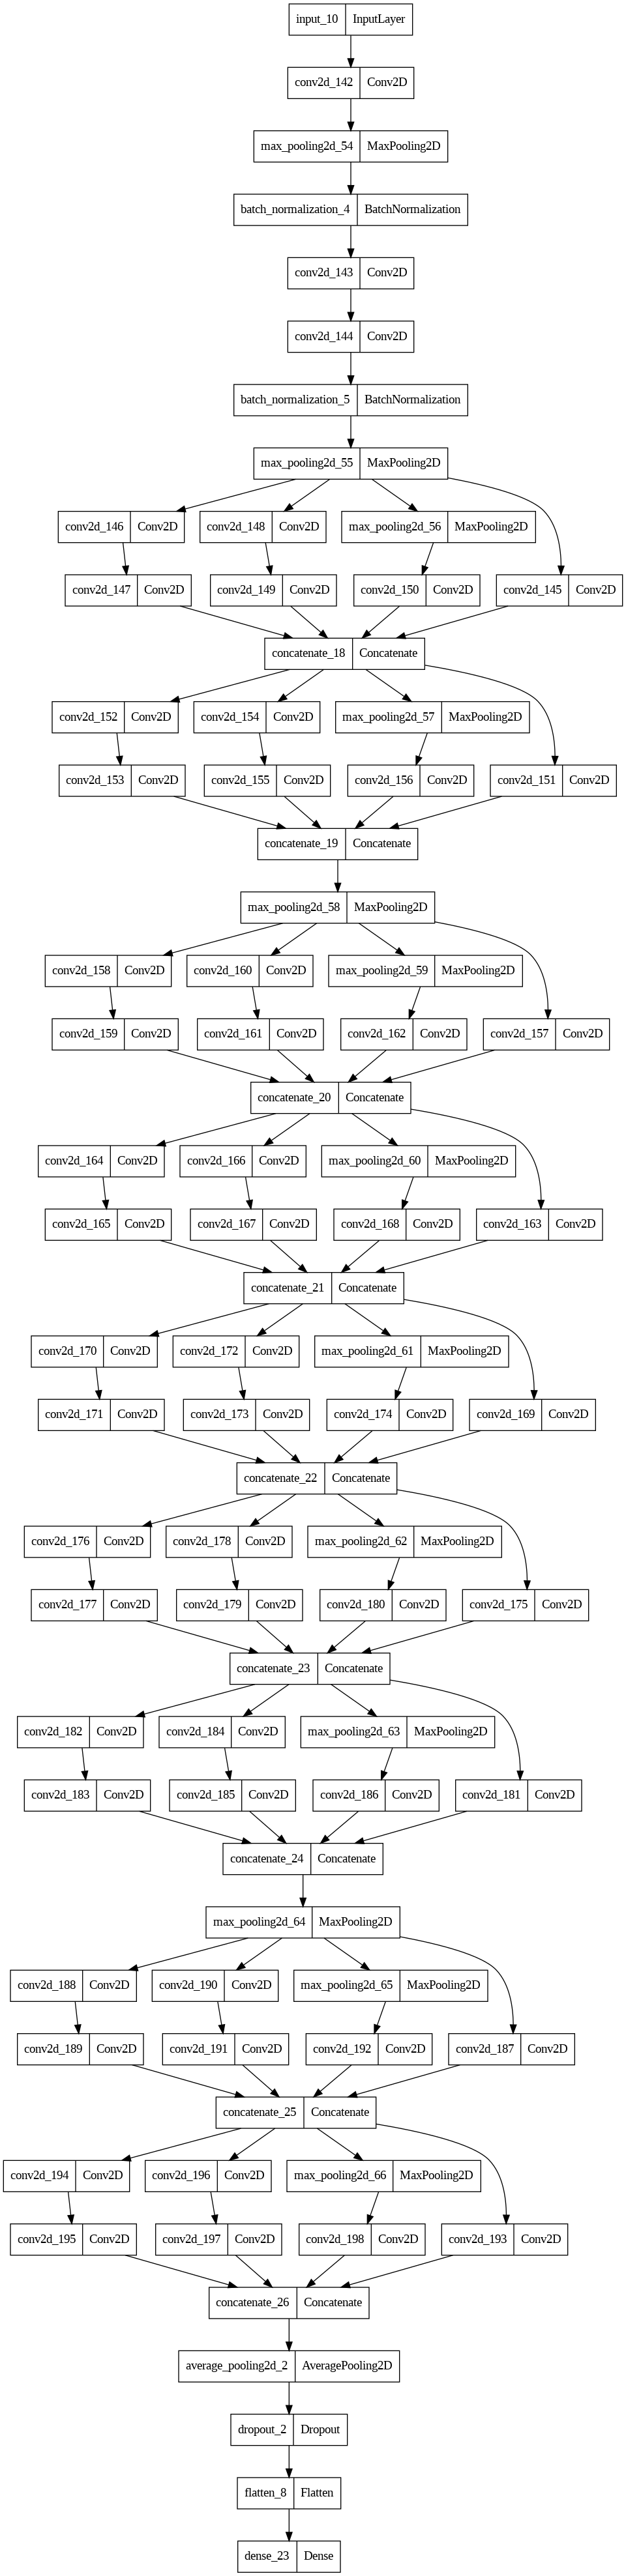

In [176]:
tf.keras.utils.plot_model(model_1)

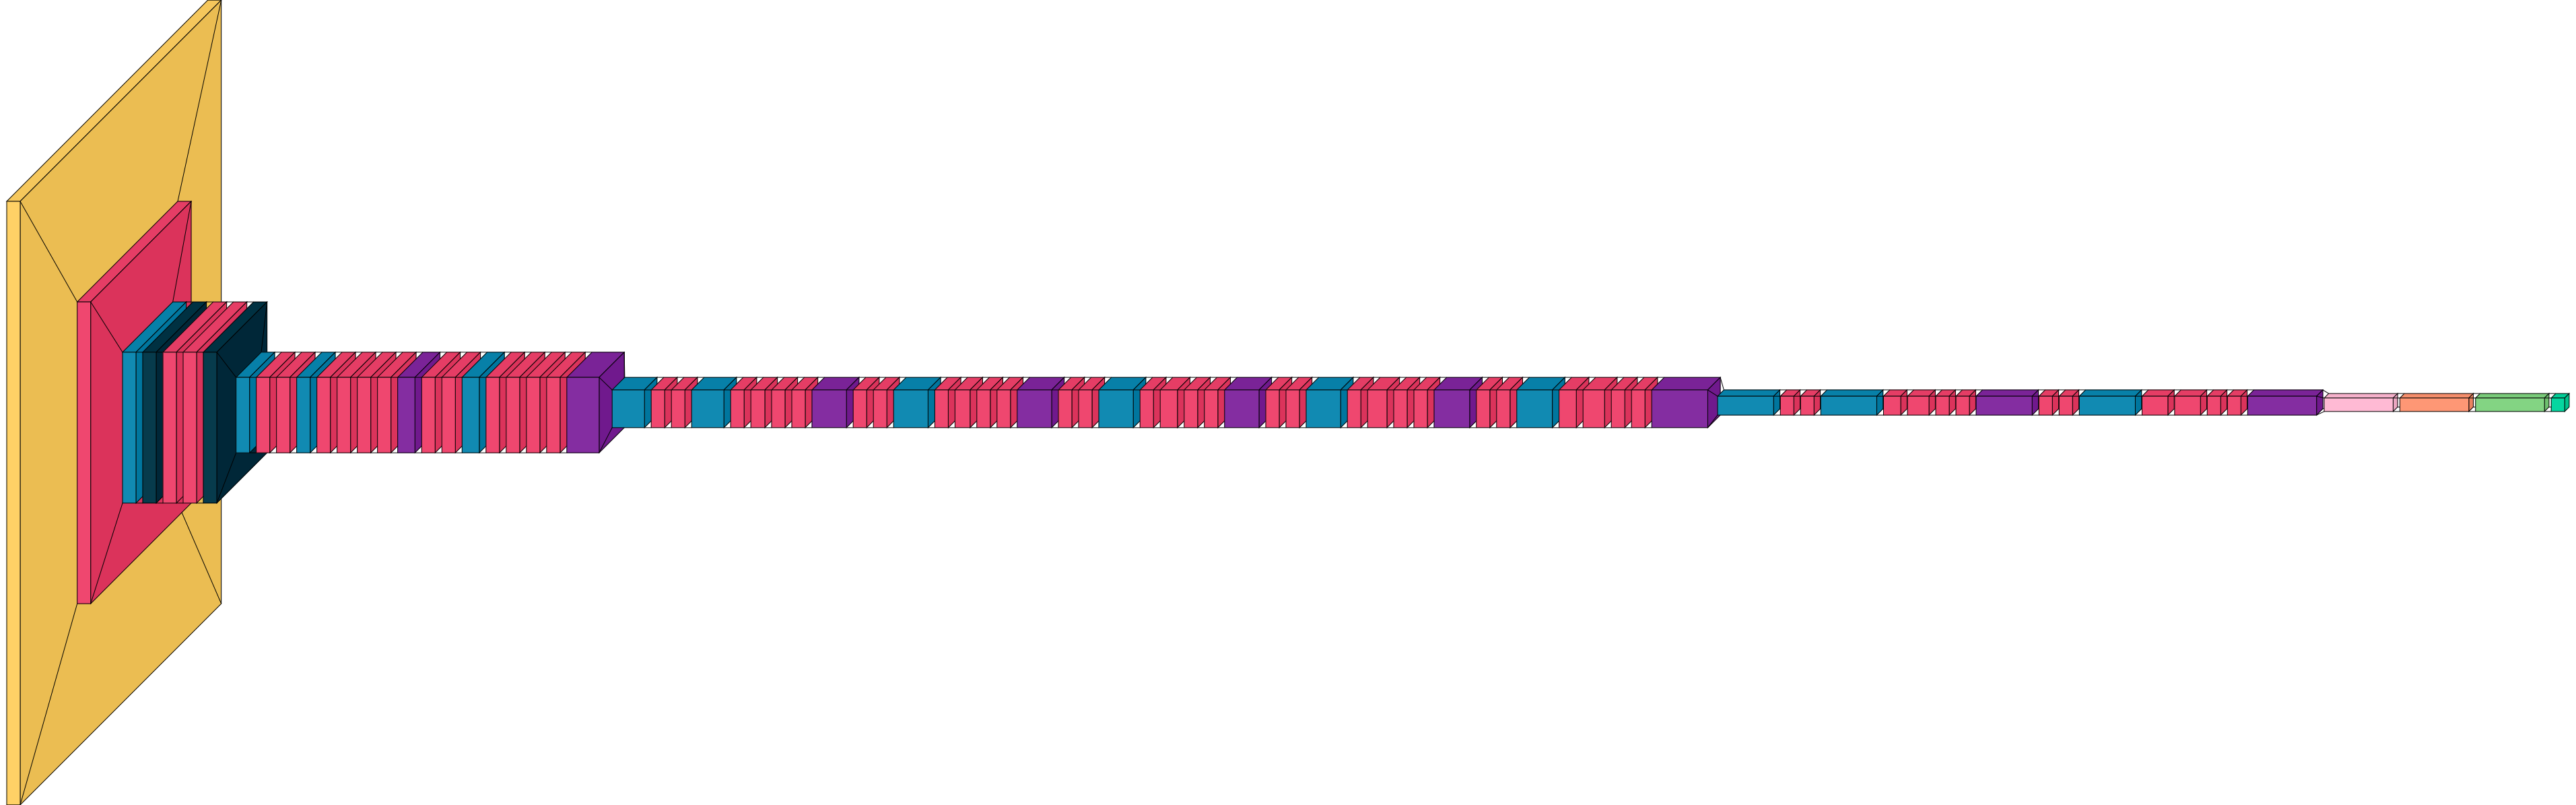

In [177]:
visualkeras.layered_view(model_1)

In [178]:
history_1 = model_1.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/30
390/390 [==============================] - 125s 260ms/step - loss: 1.8578 - accuracy: 0.4113 - val_loss: 0.8520 - val_accuracy: 0.6187
Epoch 2/30
390/390 [==============================] - 93s 237ms/step - loss: 0.6528 - accuracy: 0.7654 - val_loss: 1.3744 - val_accuracy: 0.7052
Epoch 3/30
390/390 [==============================] - 92s 236ms/step - loss: 0.4088 - accuracy: 0.8625 - val_loss: 0.0728 - val_accuracy: 0.9774
Epoch 4/30
390/390 [==============================] - 93s 238ms/step - loss: 0.2609 - accuracy: 0.9140 - val_loss: 0.2255 - val_accuracy: 0.9152
Epoch 5/30
390/390 [==============================] - 95s 243ms/step - loss: 0.1975 - accuracy: 0.9393 - val_loss: 0.0967 - val_accuracy: 0.9717
Epoch 6/30
390/390 [==============================] - 92s 237ms/step - loss: 0.1940 - accuracy: 0.9361 - val_loss: 0.7631 - val_accuracy: 0.7359
Epoch 7/30
390/390 [==============================] - 93s 237ms/step - loss: 0.2011 - accuracy: 0.9389 - val_loss: 0.0809 - val_a

In [179]:
model_1.evaluate(valid_data)

78/78 [==============================] - 7s 90ms/step - loss: 0.1103 - accuracy: 0.9580


[0.11027096956968307, 0.9579967856407166]

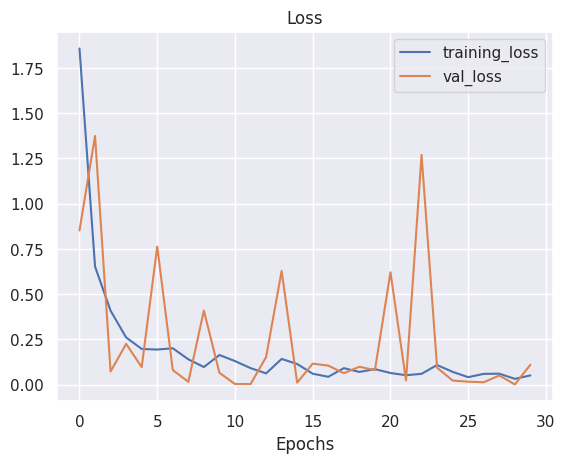

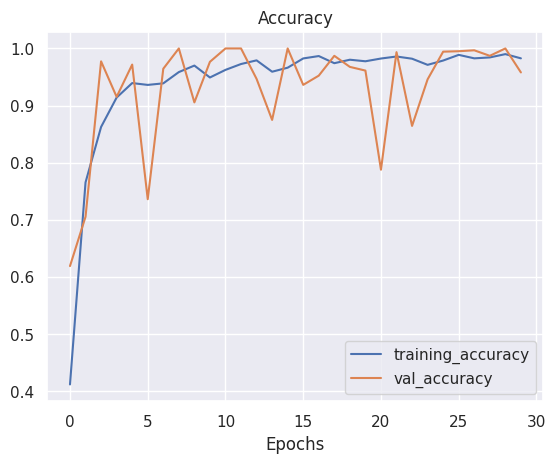

In [181]:
plot_loss_curves(history_1)

195/195 [==============================] - 14s 71ms/step


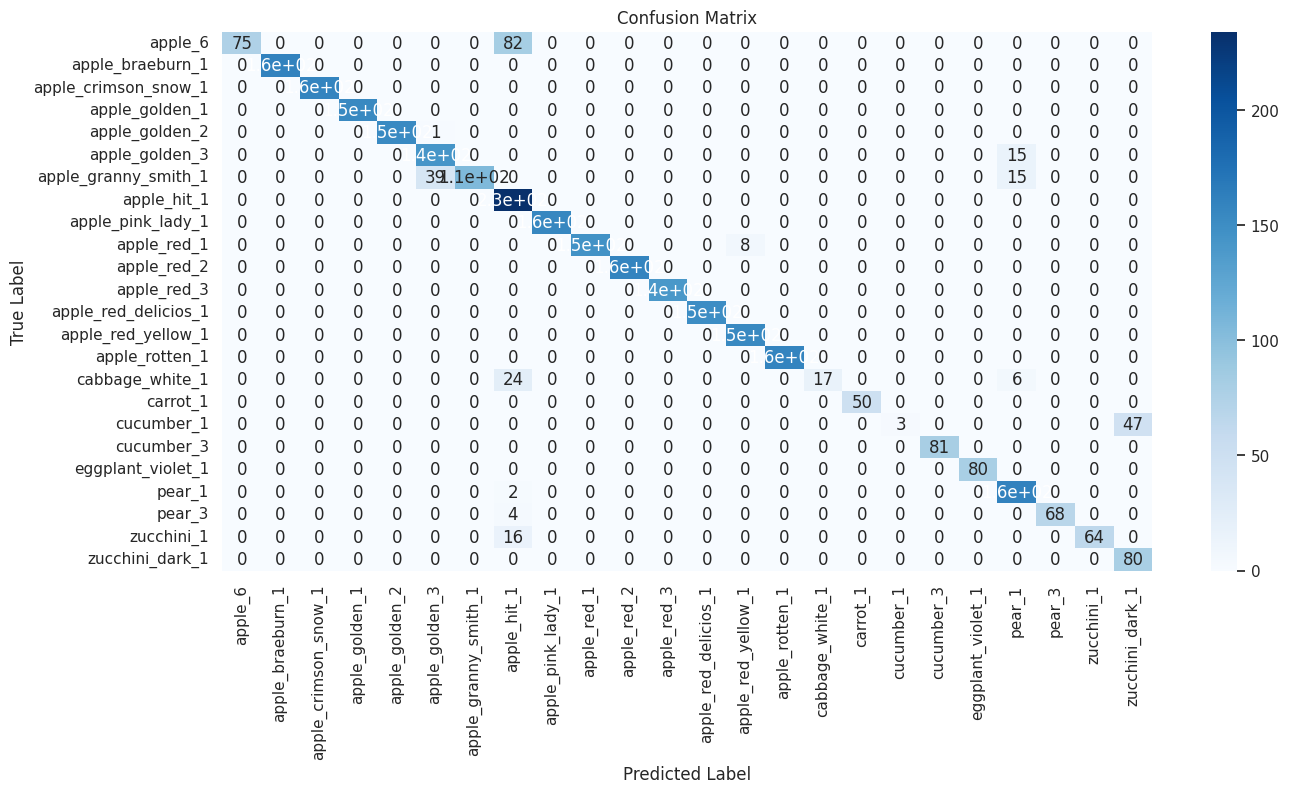

In [189]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

validation_labels = test_data.classes
validation_pred_probs = model_1.predict(test_data)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_data.class_indices.keys())
sns.set()
plt.figure(figsize=(15, 7))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [191]:
true_classes = test_data.classes
true_classes

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int32)

In [190]:
batch_size = 16

predicted_classes = np.argmax(model_1.predict(test_data,
                                            steps=int(np.ceil(test_data.samples/test_data.batch_size))), axis=1)
predicted_classes

195/195 [==============================] - 12s 61ms/step


array([ 0,  0,  7, ..., 23, 23, 23])

In [192]:
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
                       precision    recall  f1-score   support

             apple_6       1.00      0.48      0.65       157
    apple_braeburn_1       1.00      1.00      1.00       160
apple_crimson_snow_1       1.00      1.00      1.00       159
      apple_golden_1       1.00      1.00      1.00       154
      apple_golden_2       1.00      0.99      1.00       154
      apple_golden_3       0.78      0.91      0.84       158
apple_granny_smith_1       1.00      0.66      0.80       160
         apple_hit_1       0.65      1.00      0.79       234
   apple_pink_lady_1       1.00      1.00      1.00       156
         apple_red_1       1.00      0.95      0.97       154
         apple_red_2       1.00      1.00      1.00       159
         apple_red_3       1.00      1.00      1.00       140
apple_red_delicios_1       1.00      1.00      1.00       150
  apple_red_yellow_1       0.95      1.00      0.97       154
      apple_rotten_1       1.00      1.00    